In [ ]:
# Project 4: English Premier League Dataset

In [ ]:
# Problem Statement & Business Question:

In [ ]:
# You are a scout for a European soccer club. Your primary responsibility is to pinpoint the best up and coming 
# players in the game so that your club can beat out the competition and acquire the best talent to stay ahead. Your 
# club has scouts assigned to each region, and has decided to appoint you in charge of Europe, specifically the 
# Enlgish Premier League (EPL). Due to increased commercialization and an unprecedented amount of money flowing into 
# the game, the competition for scouting top talent has never been more intense. You have to make use of the English 
# Premier League dataset in order to accmomplish this task. Use this data to find the most highly valued players in
# order to scout players in the future. What common characteristics do they share? What are the driving factors behind
# their high market value? Which factor impacts market value the most? What is the average market value? What is the 
# difference in value between foreign and local players? How much of a factor is age? Which position has the most high
# valued players? What is the difference between the value of a player who plays for a big club (top 6 clubs) vs one 
# who plays for a small club? Build and test a model to analyze the data. Interpret your results and communicate
# your findings.

In [ ]:
# Limitations of Dataset:
# 1- No data on player stats such as goals, assists, tackles, interceptions etc to assess performance and its impact on
#   market value; best inputs/factors closest to stats are fpl_points, fpl_sel, and fpl_value
# 2- Dataset is a snapshot in time as it does not provide data over a 10 year period for example; this prevents trend 
#   analysis to analyze a player's market value over time for instance (e.g from the age of 20 to 30)
# 3- Dataset is focused on English Premier League only; can't compare to other leagues. This means we can only infer
#  these inputs influence market value the way they do only for players in the English Premier League e.g. do 'big
#  clubs' have the same clout, financial strength, and popularity in other leagues?

In [ ]:
# Dataset Key

# name: Name of the player

# club: Club of the player

# age : Age of the player

# position : The usual position on the pitch

# position_cat :

# 1 for attackers
# 2 for midfielders
# 3 for defenders
# 4 for goalkeepers
# market_value : As on transfermrkt.com on July 20th, 2017

# page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017

# fpl_value : Value in Fantasy Premier League as on July 20th, 2017

# fpl_sel : % of FPL players who have selected that player in their team

# fpl_points : FPL points accumulated over the previous season

# region:

# 1 for England
# 2 for EU
# 3 for Americas
# 4 for Rest of World

# nationality

# new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)

# age_cat:

# 1 for <21
# 2 for 22-24
# 3 for 25-27
# 4 for 28-30
# 5 for 31-33
# 6 for 34+

# club_id

# big_club: Whether one of the Top 6 clubs (Arsenal, Liverpool, Manchester United, Manchester City, Chelsea, Tottenham)

# new_signing: Whether a new signing for 2017/18 (till 20th July)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
epldata = pd.read_csv('epldata_final.csv')

In [5]:
epldata.shape

(461, 17)

In [98]:
epldata.shape

(461, 17)

In [52]:
epldata.head(10)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0
5,Hector Bellerin,Arsenal,22,RB,3,30.0,1675,6.0,13.70%,119,2.0,Spain,0,2,1,1,0
6,Olivier Giroud,Arsenal,30,CF,1,22.0,2230,8.5,2.50%,116,2.0,France,0,4,1,1,0
7,Nacho Monreal,Arsenal,31,LB,3,13.0,555,5.5,4.70%,115,2.0,Spain,0,4,1,1,0
8,Shkodran Mustafi,Arsenal,25,CB,3,30.0,1877,5.5,4.00%,90,2.0,Germany,0,3,1,1,1
9,Alex Iwobi,Arsenal,21,LW,1,10.0,1812,5.5,1.00%,89,4.0,Nigeria,0,1,1,1,0


In [9]:
epldata.tail(10)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
451,Aaron Cresswell,West+Ham,27,LB,3,12.0,380,5.0,1.30%,60,1.0,England,0,3,20,0,0
452,Pedro Obiang,West+Ham,25,CM,2,9.0,286,4.5,0.30%,55,2.0,Spain,0,3,20,0,0
453,Sofiane Feghouli,West+Ham,27,RW,1,12.0,394,5.5,0.20%,55,4.0,Algeria,0,3,20,0,1
454,Angelo Ogbonna,West+Ham,29,CB,3,9.0,247,4.5,1.10%,45,2.0,Italy,0,4,20,0,0
455,Pablo Zabaleta,West+Ham,32,RB,3,7.0,698,5.0,2.70%,45,3.0,Argentina,0,5,20,0,0
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1
460,Diafra Sakho,West+Ham,27,CF,1,10.0,214,5.5,0.10%,12,4.0,Senegal,0,3,20,0,0


In [11]:
epldata.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

In [13]:
epldata.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [15]:
epldata.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [227]:
epldata.fpl_points.mean()

57.31453362255965

Text(0.5, 1.0, 'Relationship Between Age & Market Value')

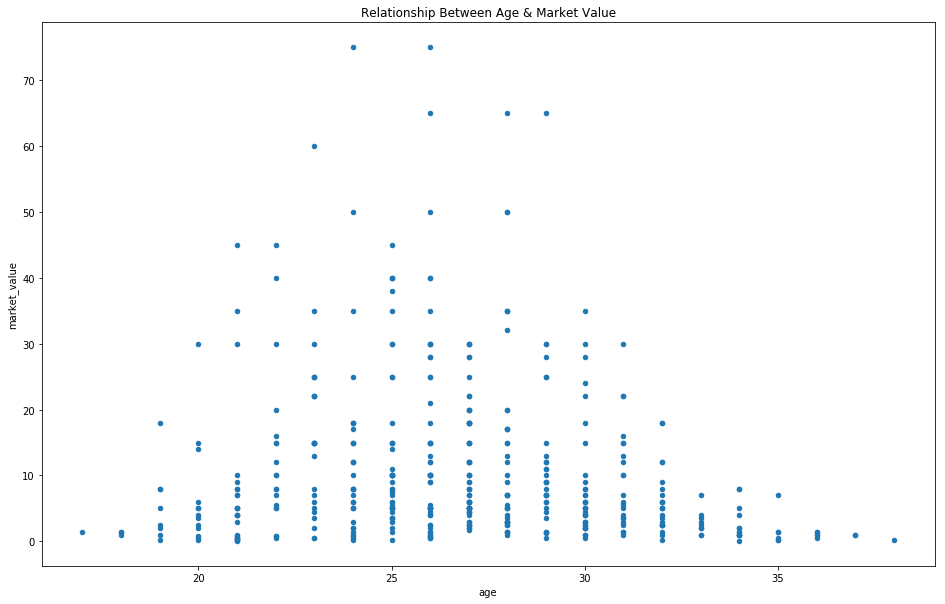

In [212]:
epldata.plot(kind='scatter', x='age', y='market_value', figsize= (16,10))
plt.xlabel('age')
plt.ylabel('market_value')
plt.title('Relationship Between Age & Market Value')

In [21]:
from pydoc import help
from scipy.stats.stats import pearsonr

In [24]:
pearsonr(epldata.age,epldata.market_value)

(-0.13239623149378976, 0.0044064776673862875)

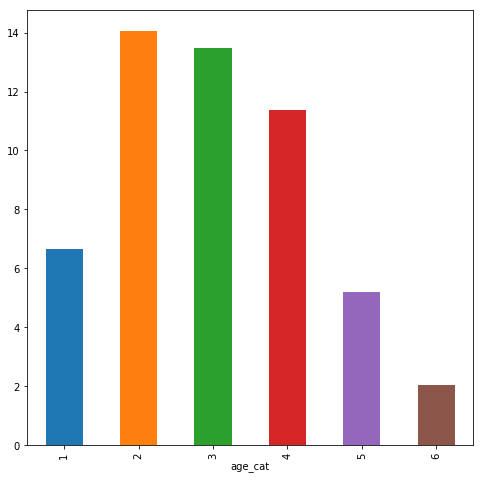

In [101]:
temporary = epldata.groupby('age_cat').mean()['market_value']
temporary.plot(kind='bar', figsize= (8,8))
# 1 for <21   -- this age group has an average market value of just over 6 million
# 2 for 22-24 -- on average, players in this age range have the highest market value
# 3 for 25-27 -- on average, players in this age range have the second highest market value
# 4 for 28-30 -- on average, players in this age range have the third highest market value
# 5 for 31-33 -- this group has the second lowest market value
# 6 for 34+   -- expectedly, this age range possesses the players with the least market value

# players aged 22-24 have the highest value on average; however, it should be noted that the difference between
#  categories 2, 3, and 4 is slight

Text(0.5, 1.0, 'Relationship Between Fantasy Premier League Points & Market Value')

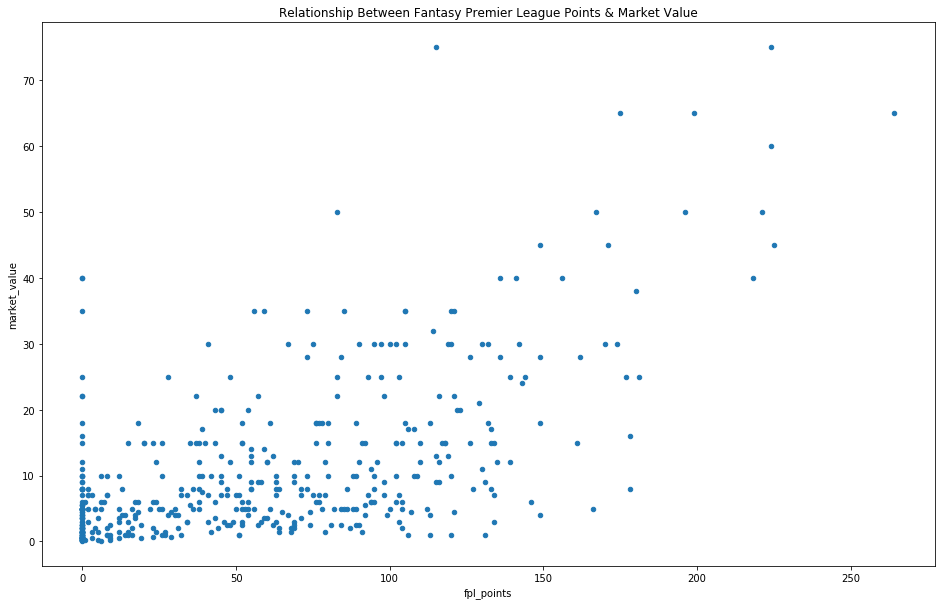

In [214]:
epldata.plot(kind='scatter', x='fpl_points', y='market_value', figsize= (16,10))
plt.xlabel('fpl_points')
plt.ylabel('market_value')
plt.title('Relationship Between Fantasy Premier League Points & Market Value')

In [32]:
pearsonr(epldata.fpl_points,epldata.market_value)
# 062 implies a semi-strong positive correlation between fpl points and market value

(0.6151545320799908, 2.446999244354544e-49)

In [181]:
epldata['fpl_sel'] = epldata.fpl_sel.str.extract('(\d+)', expand=True).astype(int)
# fpl_sel column was in string form; removed percentage and converted to integer in order to plot relationship
# between fpl_selection and market value

Text(0.5, 1.0, 'Relationship Between FPL Selection & Market Value')

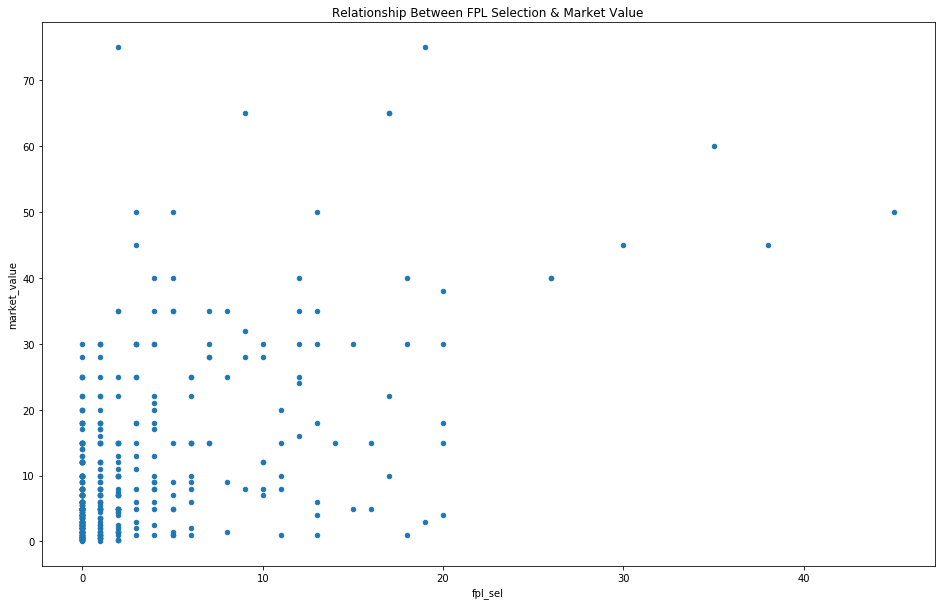

In [215]:
epldata.plot(kind='scatter', x='fpl_sel', y='market_value', figsize= (16,10))
plt.xlabel('fpl_sel')
plt.ylabel('market_value')
plt.title('Relationship Between FPL Selection & Market Value')

In [184]:
pearsonr(epldata.fpl_sel,epldata.market_value)
# correlation coefficient of 0.54 implies a decent positive relationship

(0.5467692833013259, 2.6869520899824647e-37)

Text(0.5, 1.0, 'Market Value by Region')

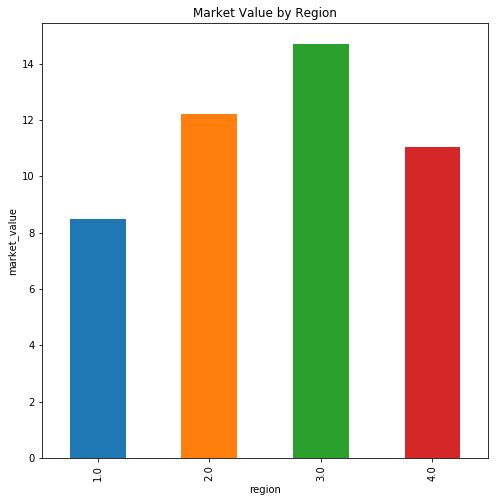

In [209]:
temp = epldata.groupby('region').mean()['market_value']
temp.plot(kind='bar', figsize= (8,8))
plt.xlabel('region')
plt.ylabel('market_value')
plt.title('Market Value by Region')
# 1 for England
# 2 for EU
# 3 for Americas
# 4 for Rest of World
# Players from the Americas have the highest market value on average (14 million), followed by Europe (12 million),
# the rest of the world (11 million) and England (8 million)

Text(0.5, 1.0, 'Market Value by Position Category')

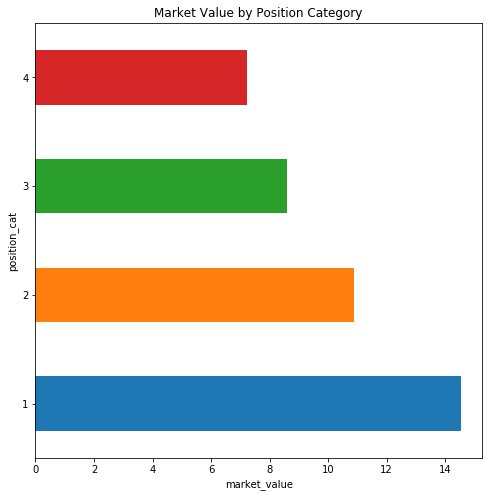

In [211]:
temp2 = epldata.groupby('position_cat').mean()['market_value']
temp2.plot(kind='barh', figsize =(8,8))
plt.xlabel('market_value')
plt.ylabel('position_cat')
plt.title('Market Value by Position Category')
# 1 for forwards
# 2 for midfielders
# 3 for defenders
# 4 for goal keepers
# On average, forwards have the highest market value (just over 14 million); they are followed by midfielders 
# (11 million), defenders (8 million), and lastly goal keepers (7 million)

Text(0.5, 1.0, 'Total Market Value by Club')

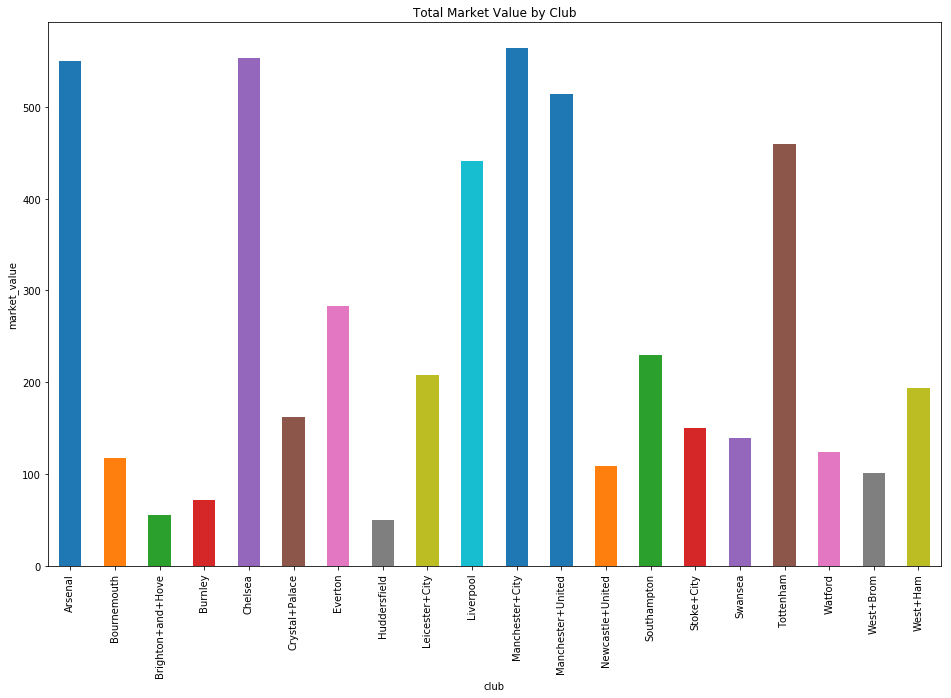

In [216]:
temp3 = epldata.groupby('club').sum()['market_value']
temp3.plot(kind='bar', figsize =(16,10))
plt.xlabel('club')
plt.ylabel('market_value')
plt.title('Total Market Value by Club')
# From the visualization it is clear that whether a club is part of the 'big 6' or not is a significant factor
# The total market value of a big 6 club's squad (Arsenal, Chelsea, Liverpool, Manchester City, Manchester United, and 
# Tottenham is significantly more than that of the smaller clubs)

Text(0, 0.5, 'market_value')

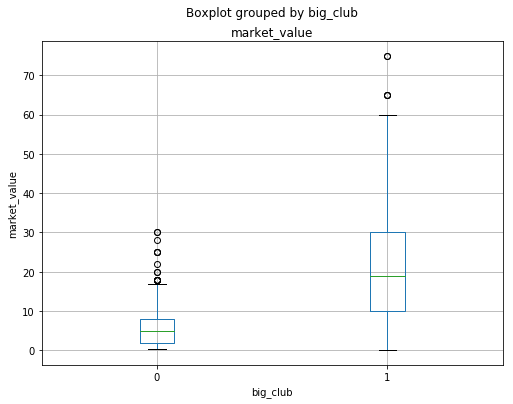

In [218]:
epldata.boxplot(column='market_value', by='big_club', figsize= (8,6))
plt.xlabel('big_club')
plt.ylabel('market_value')

Text(0, 0.5, 'market_value')

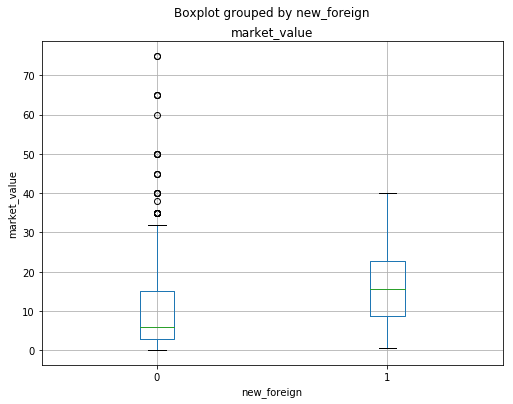

In [219]:
epldata.boxplot(column='market_value', by='new_foreign', figsize= (8,6))
plt.xlabel('new_foreign')
plt.ylabel('market_value')

Text(0, 0.5, 'market_value')

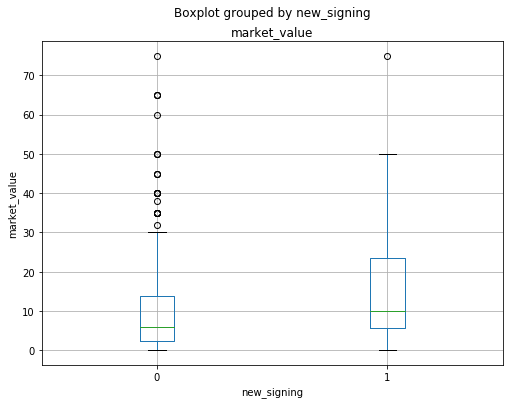

In [220]:
epldata.boxplot(column='market_value', by='new_signing', figsize= (8,6))
plt.xlabel('new_signing')
plt.ylabel('market_value')

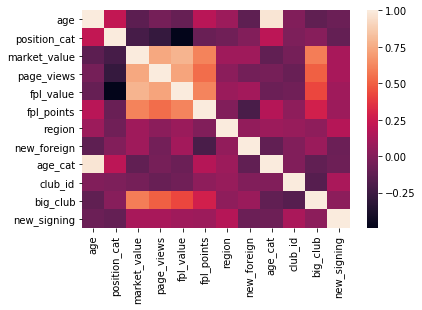

In [106]:
epldata_correlations = epldata.corr();
sns.heatmap(epldata_correlations);

In [ ]:
# Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression

In [118]:
feature_cols = ['age','fpl_value','region','big_club']

In [119]:
region_dummies = pd.get_dummies(epldata.region, prefix='region')

In [114]:
region_dummies.sample(n=5, random_state=1)

,region_1.0,region_2.0,region_3.0,region_4.0
330,1,0,0,0
101,0,0,1,0
191,0,1,0,0
66,1,0,0,0
326,0,1,0,0


In [115]:
region_dummies.drop(region_dummies.columns[0], axis=1, inplace=True)

In [116]:
region_dummies.sample(n=5, random_state=1)

,region_2.0,region_3.0,region_4.0
330,0,0,0
101,0,1,0
191,1,0,0
66,0,0,0
326,1,0,0


In [122]:
epldata_new = pd.concat([epldata, region_dummies], axis=1)
epldata_new.sample(n=5, random_state=1)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,...,nationality,new_foreign,age_cat,club_id,big_club,new_signing,region_1.0,region_2.0,region_3.0,region_4.0
330,Marko ArnautoviÄ‡,Stoke+City,28,LW,1,15.0,579,7.0,0.70%,117,...,England,0,4,15,0,0,1,0,0,0
101,Willian,Chelsea,28,RW,1,32.0,1165,7.0,9.00%,114,...,Brazil,0,4,5,1,0,0,0,1,0
191,Kasper Schmeichel,Leicester+City,30,GK,4,10.0,1601,5.0,2.40%,109,...,Denmark,0,4,9,0,0,0,1,0,0
66,Solly March,Brighton+and+Hove,23,RM,2,0.5,139,5.0,0.20%,0,...,England,0,2,3,0,0,1,0,0,0
326,Jeremy Pied,Southampton,28,RM,2,3.5,136,4.5,0.10%,5,...,France,0,4,14,0,1,0,1,0,0


In [120]:
redef_feature_cols = ['age', 'fpl_value', 'region_2.0', 'region_3.0', 'region_4.0', 'big_club']

In [123]:
# Create X and y.
X = epldata_new[redef_feature_cols]
y = epldata_new.market_value

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

-21.49155833149198
[-0.13087906  5.9258304   2.15508218  1.40256637  1.41640297  8.11272884]


In [131]:
list(zip(redef_feature_cols, linreg.coef_))

[('age', -0.13087905612107395),
 ('fpl_value', 5.925830400457193),
 ('region_2.0', 2.1550821786500807),
 ('region_3.0', 1.4025663682420695),
 ('region_4.0', 1.4164029710058992),
 ('big_club', 8.112728843591803)]

In [337]:
X = epldata_new[redef_feature_cols]
y = epldata_new.market_value

import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

# By looking at the matrix below, we can interpret the p-values for the input variables and their significance
# Age, region_3.0, and region_4.0 have p-values greater than 0.05, which implies they are not significant
# On the other hand, fpl_value, region_2.0, and big_club have p-values close to 0; we can infer that these factors 
# are significant as the values are all less than 0.05, which is the cutoff for significance

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     185.9
Date:                Fri, 11 Jan 2019   Prob (F-statistic):          7.02e-119
Time:                        16:27:18   Log-Likelihood:                -1523.1
No. Observations:                 461   AIC:                             3060.
Df Residuals:                     454   BIC:                             3089.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.4916      2.599     -8.270      0.0

In [133]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(epldata_new, redef_feature_cols):
    X = epldata_new[redef_feature_cols]
    y = epldata_new.market_value
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [135]:
print(train_test_rmse(epldata_new, ['age', 'fpl_value', 'region_2.0', 'region_3.0', 'region_4.0', 'big_club']))
print(train_test_rmse(epldata_new, ['age', 'fpl_value', 'region_2.0', 'region_3.0', 'region_4.0']))
print(train_test_rmse(epldata_new, ['age', 'fpl_value', 'region_3.0', 'region_4.0', 'big_club']))
print(train_test_rmse(epldata_new, ['age', 'fpl_value', 'region_2.0', 'region_4.0', 'big_club']))
print(train_test_rmse(epldata_new, ['age', 'fpl_value', 'region_2.0', 'region_3.0', 'big_club']))
print(train_test_rmse(epldata_new, ['age', 'big_club']))
print(train_test_rmse(epldata_new, ['fpl_value', 'big_club']))
print(train_test_rmse(epldata_new, ['age', 'fpl_value', 'big_club']))




7.073858740533211
7.705638199570018
7.125379455681801
7.095619272861835
7.097689367190503
11.260969046357467
7.065584803330878
7.105039987104799


In [ ]:
# Train/Test split


In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [137]:
# Before splitting
print(X.shape)

# After splitting
print(X_train.shape)
print(X_test.shape)

(461, 6)
(345, 6)
(116, 6)


In [138]:
print(y.shape)

# After splitting
print(y_train.shape)
print(y_test.shape)

(461,)
(345,)
(116,)


In [ ]:
# Cross Validation


In [139]:
from sklearn import model_selection

In [141]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

In [142]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 42.695405525245675
R2: 0.7097200922717772

Model 2
MSE: 34.22828997560148
R2: 0.7097504180844194

Model 3
MSE: 40.61941882378057
R2: 0.7088983454802338

Model 4
MSE: 54.89408921681394
R2: 0.7060953738659581

Model 5
MSE: 56.573975691917006
R2: 0.7096640900641054

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 45.802235846671735
Mean of R2 for all folds: 0.7088256639532988


In [ ]:
#  Model Testing with non-EPL Players:

# I used the model to predict the value of 3 non English Premier League Players: Antoine Griezman, Marco Reus, and Neymar

In [333]:
Non_EPL_Test_Data = {'name': ['Antoine Griezman','Marco Reus','Neymar'], 'club': ['Atletico Madrid','Borrusia Dortmund','PSG'], 'age': [25,27,24], 'position': ['LW','LW','LW'], 'position_cat': ['1','1','1'], 'page_views': ['','',''], 'fpl_value': [9.937,9.937,9.937], 'fpl_sel': ['','',''], 'fpl_points': ['','',''], 'region': ['2.0', '2.0', '3.0'],'nationality': ['French', 'German', 'Brazilian'],'new_foreign': ['0','0','0'],'age_cat': ['3','3','2'],'big_club': ['1','1','1'], 'new_signing': ['0','0','0'], 'region_1.0': [0.0, 0.0, 0.0], 'region_2.0': [1.0, 1.0, 0.0], 'region_3.0': [0.0, 0.0, 1.0], 'region_4.0': [0.0, 0.0, 0.0]}
Non_EPL_Test_Data = pd.DataFrame(data=Non_EPL_Test_Data)
# Non_EPL_Test_Data = pd.DataFrame.from_dict(Non_EPL_Test_Data)
print(Non_EPL_Test_Data)

               name               club  age position position_cat page_views  \
0  Antoine Griezman    Atletico Madrid   25       LW            1              
1        Marco Reus  Borrusia Dortmund   27       LW            1              
2            Neymar                PSG   24       LW            1              

   fpl_value fpl_sel fpl_points region nationality new_foreign age_cat  \
0      9.937                       2.0      French           0       3   
1      9.937                       2.0      German           0       3   
2      9.937                       3.0   Brazilian           0       2   

  big_club new_signing  region_1.0  region_2.0  region_3.0  region_4.0  
0        1           0         0.0         1.0         0.0         0.0  
1        1           0         0.0         1.0         0.0         0.0  
2        1           0         0.0         0.0         1.0         0.0  


In [334]:
ANT = Non_EPL_Test_Data[redef_feature_cols]

In [335]:
y_prediction = linreg.predict(ANT)
print(y_prediction)
# The model predicts their market values as 44.3, 44.1, and 43.7

[44.38925298 44.12749486 43.76761622]


In [222]:
# 30/461 * 100

6.507592190889371

In [ ]:
#  Do High Market Value Possess the Factors Analyzed Above?

# Here's a look at the actual players with the highest market value in the English Premier League
# The top 30 players in the EPL with the highest market value are analyzed further to determine whether the 
# characteristics that comprise high market value players are present among these players
# This top 30 player sample represents 6.5% of the total number of players in the data

In [228]:
epldata[['name','age','age_cat','fpl_points','position_cat','region','big_club','market_value']].sort_values(by='market_value',ascending=False).head(30)

,name,age,age_cat,fpl_points,position_cat,region,big_club,market_value
92,Eden Hazard,26,3,224,1,2.0,1,75.0
263,Paul Pogba,24,2,115,2,2.0,1,75.0
0,Alexis Sanchez,28,4,264,1,3.0,1,65.0
240,Kevin De Bruyne,26,3,199,1,2.0,1,65.0
241,Sergio Aguero,29,4,175,1,3.0,1,65.0
377,Harry Kane,23,2,224,1,1.0,1,60.0
93,Diego Costa,28,4,196,1,2.0,1,50.0
104,N%27Golo Kante,26,3,83,2,2.0,1,50.0
1,Mesut Ozil,28,4,167,1,2.0,1,50.0
260,Romelu Lukaku,24,2,221,1,2.0,1,50.0


In [315]:
epldata.sort_values(by='market_value', ascending=False).head(8).fpl_value.mean()
# This value was computed to use as an average for fpl_value for the non EPL players I entered into the dataset

9.9375

In [229]:
Final_Table = epldata[['name','age','age_cat','fpl_points','position_cat','region','big_club','market_value']].sort_values(by='market_value', ascending=False).head(30)

In [198]:
Final_Table.age.median()
# The top 30 players in terms of market value have an average age of 25.5; this falls under age category 3, 25-27.
# This age range, along with age range 2 (22-24) have the players with the highest value. Age range 2 has an average
# value of 14 million pounds and age range 3 has an average value of just under 14 million pounds

25.5

In [203]:
Final_Table.age_cat.value_counts().head()
# 1 for <21
# 2 for 22-24
# 3 for 25-27
# 4 for 28-30
# 5 for 31-33
# 6 for 34+

3    12
4     9
2     7
1     2
Name: age_cat, dtype: int64

In [306]:
Final_Table.fpl_points.mean()
# The average fpl_points for the top 30 most highly valued players is more than double the average fpl_points in the 
# English Premier League. For all 461 players, the average fpl_points tally is 57.3

136.06666666666666

In [197]:
Final_Table.position_cat.value_counts().head()
# 1 for forwards
# 2 for midfielders
# 3 for defenders
# 4 for goal keepers
# On average, forwards have the highest market value (just over 14 million); they are followed by midfielders 
# (11 million), defenders (8 million), and lastly goal keepers (7 million). In this sample of the top 30 most valuable
# players, 19 are forwards and 7 are midfielders; this shows that attacking players are more valuable on average

1    19
2     7
4     2
3     2
Name: position_cat, dtype: int64

In [196]:
Final_Table.region.value_counts().head() 
# 1 for England
# 2 for EU
# 3 for Americas
# 4 for Rest of World
# Players from the Americas have the highest market value on average (14 million), followed by Europe (12 million),
# the rest of the world (11 million) and England (8 million)

2.0    17
1.0     5
3.0     5
4.0     3
Name: region, dtype: int64

In [199]:
Final_Table.big_club.value_counts().head()
# All 30 players possessing the highest market value play for the big 6 clubs in the English Premier League

1    30
Name: big_club, dtype: int64

In [ ]:
# Limitations of Dataset & Potential Additional Avenues for Analysis:

# There were 3 main limitations with this dataset as described below.
# 1- No data on player stats such as goals, assists, tackles, interceptions etc to assess performance and its impact on
#   market value; best inputs/factors closest to stats are fpl_points, fpl_sel, and fpl_value
# 2- Dataset is a snapshot in time as it does not provide data over a 10 year period for example; this prevents trend 
#   analysis to analyze a player's market value over time for instance (e.g from the age of 20 to 30)
# 3- Dataset is focused on English Premier League only; can't compare to other leagues. This means we can only infer
#  these inputs influence market value the way they do only for players in the English Premier League e.g. do 'big
#  clubs' have the same clout, financial strength, and popularity in other leagues?

# If I had the additional relevant data, I would conduct further analysis on player statistics, the relationship of a 
# player's market value with their age (over a 10 year time period for instance), and conduct similar analysis for 
# other leagues (La Liga in Spain, Serie A in Italy, Bundesliga in Germany) to determine what drives market value in 
# those leagues and if the factors are similar to those found to be driving market value in the EPL

In [ ]:
# Recommendations:
# Focus on Europe and the Americas to find talent
# Target forwards and midfielders as they have the highest market value on average
# When calculating market value, fpl_value (performance) and big_club are the significant input variables
# For smaller clubs looking to make a profit on players, sell at age range of 22-24 as that is when market value is 
# at its highest
